<a href="https://colab.research.google.com/github/Yosuf20/Cat-Dog-Classification-CNN/blob/main/Cat_V_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tongpython/cat-and-dog")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'cat-and-dog' dataset.
Path to dataset files: /kaggle/input/cat-and-dog


In [2]:
path_train = "/kaggle/input/cat-and-dog/training_set/training_set"
path_test = "/kaggle/input/cat-and-dog/test_set/test_set"

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [4]:
train_ds = keras.utils.image_dataset_from_directory(
    path_train,
    labels = "inferred",
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
  path_test,
  labels = "inferred",
  label_mode = 'int',
  batch_size = 32,
  image_size = (256, 256)

)

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [5]:
#from keras.src.layers.preprocessing.image_preprocessing.bounding_boxes import validation
#normalization

def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [6]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])


In [22]:

#Creating Convolution layers
from keras.layers import Dropout, BatchNormalization

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding="valid"))
model.add(Dropout(0.2))

model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.2))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,440,257 (28.38 MB)

 Trainable params: 7,439,937 (28.38 MB)

 Non-trainable params: 320 (1.25 KB)

In [24]:
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [25]:
from keras.callbacks import EarlyStopping


callback = EarlyStopping(
    monitor = 'val_loss',
    patience = 0,
    verbose = 1,
    restore_best_weights = False,
    mode = 'auto',
    baseline = None
)

In [26]:
history = model.fit(train_ds,epochs=10, validation_data=validation_ds)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 39s 117ms/step - accuracy: 0.5439 - loss: 1.5353 - val_accuracy: 0.5235 - val_loss: 0.7464
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 29s 94ms/step - accuracy: 0.6220 - loss: 0.6915 - val_accuracy: 0.5606 - val_loss: 0.7299
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.6595 - loss: 0.6182 - val_accuracy: 0.6070 - val_loss: 0.6511
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 85ms/step - accuracy: 0.7106 - loss: 0.5702 - val_accuracy: 0.6436 - val_loss: 0.6904
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.7453 - loss: 0.5156 - val_accuracy: 0.6214 - val_loss: 0.8097
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.7716 - loss: 0.4784 - val_accuracy: 0.7286 - val_loss: 0.5526
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.8184 - loss: 0.4048 - val_accuracy: 0.7583 - val_loss: 0.5423
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 86ms/step - accuracy: 0.8558 - loss: 0.3243 -

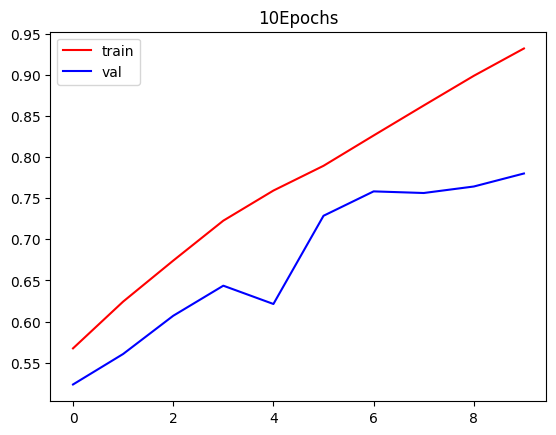

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='val')
plt.title('10Epochs')
plt.legend()
plt.show()

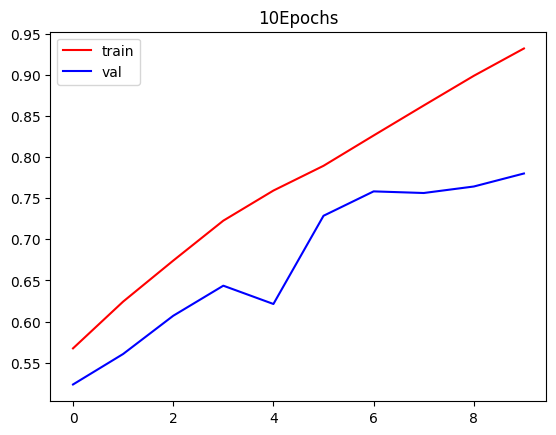

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='val')
plt.title('10Epochs')
plt.legend()
plt.show()

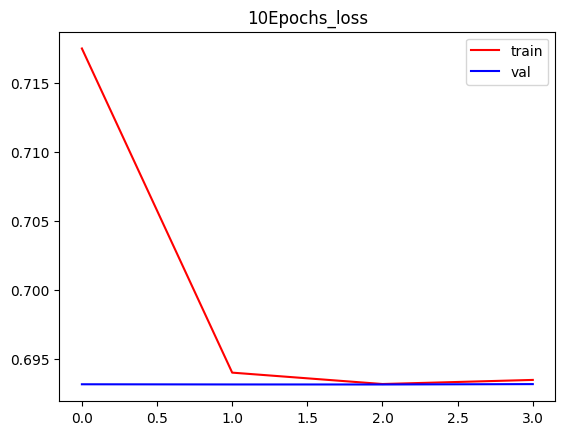

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='val')
plt.title('10Epochs_loss')
plt.legend()
plt.show()

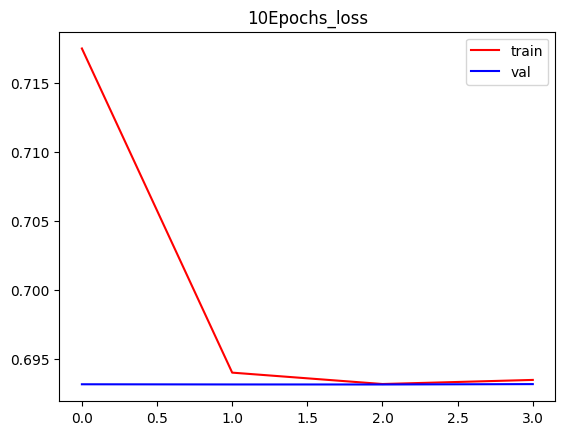

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='val')
plt.title('10Epochs_loss')
plt.legend()
plt.show()